<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Exercise 9: Data Wrangling on Multiple Tables </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

### Introduction

We have a SQLite database of 2016 US Election Primary Results (https://www.kaggle.com/benhamner/2016-us-election), which includes three tables: 
* `primary_results` : the 2016 election primary results (i.e. votes) for each county each party and each candidate
* `county_facts` : the population, economic and other related statistics at each county
* `county_facts_dictionary` : the descirption of each column name in `county_facts` table 

Our task is to explore the data, formulate a proper prediction problem, and wrangle the data among different tables to prepare a final table for machine learning modeling. 

**The complete codes are provided in the cells and please do run through each cell one by one. In between the cells there are <font color='red'>  Questions </font> to check your understandings on the codes and the cell outputs. <font color='red'> Answer all the questions accordingly and submit the completed file into BrightSpace </font>.**

In [90]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# SQL
import sqlite3

# Modeling
from sklearn.model_selection import train_test_split
from sklearn import ensemble

### 1. Load Data

If you need help on SQLite, please refer to this website https://www.tutorialspoint.com/sqlite/index.htm

In [91]:
# Connect to the SQLite Database
database = './data/database.sqlite'
conn = sqlite3.connect(database)

In [92]:
# View the tables in the database
pd.read_sql("""

SELECT *
FROM sqlite_master
WHERE type='table';

""", conn)

,type,name,tbl_name,rootpage,sql
0,table,primary_results,primary_results,2,"CREATE TABLE primary_results (\n state TEXT,\n state_abbreviation TEXT,\n county TEXT,\n fips INTEGER,\n party TEXT,\n candidate TEXT,\n votes INTEGER,\n fraction_votes NUMERIC)"
1,table,county_facts,county_facts,3,"CREATE TABLE county_facts (\n fips INTEGER PRIMARY KEY,\n area_name TEXT,\n state_abbreviation TEXT,\n PST045214 INTEGER,\n PST040210 INTEGER,\n PST120214 NUMERIC,\n POP010210 INTEGER,\n AGE135214 NUMERIC,\n AGE295214 NUMERIC,\n AGE775214 NUMERIC,\n SEX255214 NUMERIC,\n RHI125214 NUMERIC,\n RHI225214 NUMERIC,\n RHI325214 NUMERIC,\n RHI425214 NUMERIC,\n RHI525214 NUMERIC,\n RHI625214 NUMERIC,\n RHI725214 NUMERIC,\n RHI825214 NUMERIC,\n POP715213 NUMERIC,\n POP645213 NUMERIC,\n POP815213 NUMERIC,\n EDU635213 NUMERIC,\n EDU685213 NUMERIC,\n VET605213 INTEGER,\n LFE305213 NUMERIC,\n HSG010214 INTEGER,\n HSG445213 NUMERIC,\n HSG096213 NUMERIC,\n HSG495213 INTEGER,\n HSD410213 INTEGER,\n HSD310213 NUMERIC,\n INC910213 INTEGER,\n INC110213 INTEGER,\n PVY020213 NUMERIC,\n BZA010213 INTEGER,\n BZA110213 INTEGER,\n BZA115213 NUMERIC,\n NES010213 INTEGER,\n SBO001207 INTEGER,\n SBO315207 NUMERIC,\n SBO115207 NUMERIC,\n SBO215207 NUMERIC,\n SBO515207 NUMERIC,\n SBO415207 NUMERIC,\n SBO015207 NUMERIC,\n MAN450207 INTEGER,\n WTN220207 INTEGER,\n RTN130207 INTEGER,\n RTN131207 INTEGER,\n AFN120207 INTEGER,\n BPS030214 INTEGER,\n LND110210 NUMERIC,\n POP060210 NUMERIC)"
2,table,county_facts_dictionary,county_facts_dictionary,5,"CREATE TABLE county_facts_dictionary(\n column_name TEXT,\n description TEXT)"


In [93]:
# Load conty_facts table
county_facts = pd.read_sql("""

SELECT * 
FROM county_facts

""", conn)

In [94]:
county_facts

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,43806,2.7,43806,7.3,27.0,9.5,...,3.8,27.2,0,437493,898189,22843,150439,227,10426.65,4.2
3191,56039,Teton County,WY,22930,21294,7.7,21294,5.7,19.1,12.2,...,3.3,25.3,0,0,515644,25688,327363,145,3995.38,5.3
3192,56041,Uinta County,WY,20904,21118,-1.0,21118,7.6,29.8,11.0,...,2.2,15.9,0,159375,413983,20626,35497,40,2081.26,10.1
3193,56043,Washakie County,WY,8322,8533,-2.5,8533,5.5,23.9,20.1,...,0.0,26.9,0,12128,98308,12596,10175,4,2238.55,3.8


In [95]:
# Load dictionary table
dictionary = pd.read_sql("""

SELECT *
FROM county_facts_dictionary;

""", conn)

In [96]:
dictionary

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to July 1, 2014"
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [97]:
# Load primary_results table
primary_results = pd.read_sql("""

SELECT * 
FROM primary_results

""", conn)

In [98]:
primary_results

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...
24606,Wyoming,WY,Teton-Sublette,95600028,Republican,Ted Cruz,0,0.000
24607,Wyoming,WY,Uinta-Lincoln,95600027,Republican,Donald Trump,0,0.000
24608,Wyoming,WY,Uinta-Lincoln,95600027,Republican,John Kasich,0,0.000
24609,Wyoming,WY,Uinta-Lincoln,95600027,Republican,Marco Rubio,0,0.000


#### <font color='red'> Question 1: Explore the above tables, can you formulate a prediction problem for machine learning modeling? </font> 

* <font color='red'> Students to Answer:     
</font>
How many votes would a candidate get in a state based off the characteristics of the citizens or the state's GDP?


### 2. Wrangling data among multiple tables

In [99]:
primary_results.nunique()

state                   49
state_abbreviation      49
county                2633
fips                  4208
party                    2
candidate               16
votes                 5548
fraction_votes        1043
dtype: int64

In [100]:
primary_results_republican = primary_results [primary_results.party == 'Republican']
primary_results_republican.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
134,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
135,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
136,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035
137,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
138,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205


####  <font color='red'> Question 2: Please explain what is the above cell doing? </font>

*  <font color='red'>Students to Answer: 
</font> 
Primary_results_republican is a subset of the primary_results dataset, keeping only the records where the the candidate party is Republican.  

In [101]:
primary_results_republican.shape

(15652, 8)

In [102]:
df = primary_results_republican.sort_values('fraction_votes', ascending=False).drop_duplicates(['county'])
df

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
24610,Wyoming,WY,Uinta-Lincoln,95600027,Republican,Ted Cruz,53,1.000
24590,Wyoming,WY,Hot Springs-Washakie,95600030,Republican,Ted Cruz,43,1.000
24586,Wyoming,WY,Goshen-Platte,95600035,Republican,Ted Cruz,83,1.000
24570,Wyoming,WY,Campbell-Johnson,95600032,Republican,Ted Cruz,68,1.000
24070,West Virginia,WV,McDowell,54047,Republican,Donald Trump,760,0.915
...,...,...,...,...,...,...,...,...
5980,Iowa,IA,Black Hawk,19013,Republican,Ted Cruz,1585,0.268
6952,Iowa,IA,Winneshiek,19191,Republican,Donald Trump,274,0.262
22617,Vermont,VT,Waterville,95000219,Republican,Donald Trump,18,0.261
6413,Iowa,IA,Ida,19093,Republican,Donald Trump,136,0.258


####  <font color='red'> Question 3: Please explain what is the above cell doing? </font>

*  <font color='red'>Students to Answer:     
    </font>
    The cell above sorts the republican subset in descending order of fraction votes. It then removes duplicates for the 'county' column and only keeps one record per county.

In [103]:
df.candidate.value_counts(dropna=False) # same as df["candidate"].value_counts(dropna=False)

Donald Trump    1714
Ted Cruz         389
John Kasich       83
Marco Rubio       28
Ben Carson         1
Name: candidate, dtype: int64

In [104]:
df = pd.merge(df, county_facts, on='fips', how ='inner'  )
df

,state,state_abbreviation_x,county,fips,party,candidate,votes,fraction_votes,area_name,state_abbreviation_y,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,West Virginia,WV,McDowell,54047,Republican,Donald Trump,760,0.915,McDowell County,WV,...,0.0,0.0,0,19961,129379,5664,6926,7,533.46,41.5
1,West Virginia,WV,Logan,54045,Republican,Donald Trump,1665,0.896,Logan County,WV,...,0.0,34.5,124916,155660,494714,13941,39628,1,453.74,81.0
2,West Virginia,WV,Mingo,54059,Republican,Donald Trump,1161,0.895,Mingo County,WV,...,0.0,21.6,0,50456,108241,4057,9961,5,423.11,63.4
3,New Jersey,NJ,Ocean,34029,Republican,Donald Trump,44672,0.880,Ocean County,NJ,...,3.3,25.6,0,0,7307436,12922,703022,2937,628.78,917.0
4,West Virginia,WV,Wyoming,54109,Republican,Donald Trump,1593,0.878,Wyoming County,WV,...,0.0,42.6,0,5861,146968,6231,9872,2,499.45,47.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,South Carolina,SC,Greenville,45045,Republican,Donald Trump,24913,0.268,Greenville County,SC,...,3.1,26.4,10821412,11581894,6036638,13999,817772,3094,785.12,574.7
1567,Iowa,IA,Black Hawk,19013,Republican,Ted Cruz,1585,0.268,Black Hawk County,IA,...,0.6,29.1,5880301,1278450,1929430,15224,194601,314,565.77,231.7
1568,Iowa,IA,Winneshiek,19191,Republican,Donald Trump,274,0.262,Winneshiek County,IA,...,0.0,25.6,288679,167268,289636,13909,21459,47,689.87,30.5
1569,Iowa,IA,Ida,19093,Republican,Donald Trump,136,0.258,Ida County,IA,...,0.0,19.4,372971,147075,61131,8758,0,11,431.51,16.4


####  <font color='red'> Question 4: Please explain what is the above cell doing? </font>

*  <font color='red'>Students to Answer: 
    </font>
    The cell above merges the df dataset and county_facts dataset together based on the column 'fips' and inner joins it such that it preserves the order of the left keys, which is df in this case.

In [105]:
df.shape

(1571, 61)

In [106]:
df.candidate.value_counts()

Donald Trump    1172
Ted Cruz         351
John Kasich       24
Marco Rubio       24
Name: candidate, dtype: int64

In [107]:
df['target']= np.where(df.candidate == 'Donald Trump', 1, 0)
df

,state,state_abbreviation_x,county,fips,party,candidate,votes,fraction_votes,area_name,state_abbreviation_y,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,target
0,West Virginia,WV,McDowell,54047,Republican,Donald Trump,760,0.915,McDowell County,WV,...,0.0,0,19961,129379,5664,6926,7,533.46,41.5,1
1,West Virginia,WV,Logan,54045,Republican,Donald Trump,1665,0.896,Logan County,WV,...,34.5,124916,155660,494714,13941,39628,1,453.74,81.0,1
2,West Virginia,WV,Mingo,54059,Republican,Donald Trump,1161,0.895,Mingo County,WV,...,21.6,0,50456,108241,4057,9961,5,423.11,63.4,1
3,New Jersey,NJ,Ocean,34029,Republican,Donald Trump,44672,0.880,Ocean County,NJ,...,25.6,0,0,7307436,12922,703022,2937,628.78,917.0,1
4,West Virginia,WV,Wyoming,54109,Republican,Donald Trump,1593,0.878,Wyoming County,WV,...,42.6,0,5861,146968,6231,9872,2,499.45,47.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,South Carolina,SC,Greenville,45045,Republican,Donald Trump,24913,0.268,Greenville County,SC,...,26.4,10821412,11581894,6036638,13999,817772,3094,785.12,574.7,1
1567,Iowa,IA,Black Hawk,19013,Republican,Ted Cruz,1585,0.268,Black Hawk County,IA,...,29.1,5880301,1278450,1929430,15224,194601,314,565.77,231.7,0
1568,Iowa,IA,Winneshiek,19191,Republican,Donald Trump,274,0.262,Winneshiek County,IA,...,25.6,288679,167268,289636,13909,21459,47,689.87,30.5,1
1569,Iowa,IA,Ida,19093,Republican,Donald Trump,136,0.258,Ida County,IA,...,19.4,372971,147075,61131,8758,0,11,431.51,16.4,1


####  <font color='red'> Question 5: Please explain what is the above cell doing? </font>

*  <font color='red'>Students to Answer: 
    </font>
    The cell above creates a new column 'target' that checks if the candidate that won was Donald Trump. If he won, the value assigned to the column would be 1, or 0 otherwise.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1570
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 1571 non-null   object 
 1   state_abbreviation_x  1571 non-null   object 
 2   county                1571 non-null   object 
 3   fips                  1571 non-null   object 
 4   party                 1571 non-null   object 
 5   candidate             1571 non-null   object 
 6   votes                 1571 non-null   int64  
 7   fraction_votes        1571 non-null   float64
 8   area_name             1571 non-null   object 
 9   state_abbreviation_y  1571 non-null   object 
 10  PST045214             1571 non-null   int64  
 11  PST040210             1571 non-null   int64  
 12  PST120214             1571 non-null   float64
 13  POP010210             1571 non-null   int64  
 14  AGE135214             1571 non-null   float64
 15  AGE295214            

In [109]:
df_final = df.iloc[:, 10:]
df_final

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,target
0,20448,22113,-7.5,22113,6.3,20.6,18.1,50.6,89.4,9.0,...,0.0,0,19961,129379,5664,6926,7,533.46,41.5,1
1,35348,36745,-3.8,36743,5.9,20.7,17.2,50.4,96.7,2.0,...,34.5,124916,155660,494714,13941,39628,1,453.74,81.0,1
2,25716,26834,-4.2,26839,6.4,22.1,15.5,50.7,96.5,1.9,...,21.6,0,50456,108241,4057,9961,5,423.11,63.4,1
3,586301,576565,1.7,576567,6.8,23.5,21.9,51.9,92.9,3.5,...,25.6,0,0,7307436,12922,703022,2937,628.78,917.0,1
4,22598,23801,-5.1,23796,5.3,21.4,17.5,50.5,97.9,0.7,...,42.6,0,5861,146968,6231,9872,2,499.45,47.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,482752,451219,7.0,451225,6.4,23.5,14.3,51.4,76.9,18.5,...,26.4,10821412,11581894,6036638,13999,817772,3094,785.12,574.7,1
1567,132897,131090,1.4,131090,6.1,21.5,14.8,51.1,86.2,9.0,...,29.1,5880301,1278450,1929430,15224,194601,314,565.77,231.7,0
1568,20768,21058,-1.4,21056,4.3,18.9,18.1,50.5,97.0,0.8,...,25.6,288679,167268,289636,13909,21459,47,689.87,30.5,1
1569,7042,7089,-0.7,7089,7.1,23.8,21.6,50.1,97.8,0.4,...,19.4,372971,147075,61131,8758,0,11,431.51,16.4,1


####  <font color='red'> Question 6: Please explain what is the above cell doing? </font>

*  <font color='red'>Students to Answer: 
    </font>
    The above cell selects creates a subset of df which captures all of its rows but only its column starting from the 10th index onwards.

In [110]:
dictionary

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to July 1, 2014"
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [111]:
dictionary.set_index('column_name', inplace = True)
dictionary

,description
column_name,
PST045214,"Population, 2014 estimate"
PST040210,"Population, 2010 (April 1) estimates base"
PST120214,"Population, percent change - April 1, 2010 to July 1, 2014"
POP010210,"Population, 2010"
AGE135214,"Persons under 5 years, percent, 2014"
AGE295214,"Persons under 18 years, percent, 2014"
AGE775214,"Persons 65 years and over, percent, 2014"
SEX255214,"Female persons, percent, 2014"
RHI125214,"White alone, percent, 2014"


In [112]:
dic = dictionary.to_dict()
dic

{'description': {'PST045214': 'Population, 2014 estimate',
  'PST040210': 'Population, 2010 (April 1) estimates base',
  'PST120214': 'Population, percent change - April 1, 2010 to July 1, 2014',
  'POP010210': 'Population, 2010',
  'AGE135214': 'Persons under 5 years, percent, 2014',
  'AGE295214': 'Persons under 18 years, percent, 2014',
  'AGE775214': 'Persons 65 years and over, percent, 2014',
  'SEX255214': 'Female persons, percent, 2014',
  'RHI125214': 'White alone, percent, 2014',
  'RHI225214': 'Black or African American alone, percent, 2014',
  'RHI325214': 'American Indian and Alaska Native alone, percent, 2014',
  'RHI425214': 'Asian alone, percent, 2014',
  'RHI525214': 'Native Hawaiian and Other Pacific Islander alone, percent, 2014',
  'RHI625214': 'Two or More Races, percent, 2014',
  'RHI725214': 'Hispanic or Latino, percent, 2014',
  'RHI825214': 'White alone, not Hispanic or Latino, percent, 2014',
  'POP715213': 'Living in same house 1 year & over, percent, 2009-201

In [113]:
df_final = df_final.rename(columns = dic['description'])
df_final.head()

,"Population, 2014 estimate","Population, 2010 (April 1) estimates base","Population, percent change - April 1, 2010 to July 1, 2014","Population, 2010","Persons under 5 years, percent, 2014","Persons under 18 years, percent, 2014","Persons 65 years and over, percent, 2014","Female persons, percent, 2014","White alone, percent, 2014","Black or African American alone, percent, 2014",...,"Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010",target
0,20448,22113,-7.5,22113,6.3,20.6,18.1,50.6,89.4,9.0,...,0.0,0,19961,129379,5664,6926,7,533.46,41.5,1
1,35348,36745,-3.8,36743,5.9,20.7,17.2,50.4,96.7,2.0,...,34.5,124916,155660,494714,13941,39628,1,453.74,81.0,1
2,25716,26834,-4.2,26839,6.4,22.1,15.5,50.7,96.5,1.9,...,21.6,0,50456,108241,4057,9961,5,423.11,63.4,1
3,586301,576565,1.7,576567,6.8,23.5,21.9,51.9,92.9,3.5,...,25.6,0,0,7307436,12922,703022,2937,628.78,917.0,1
4,22598,23801,-5.1,23796,5.3,21.4,17.5,50.5,97.9,0.7,...,42.6,0,5861,146968,6231,9872,2,499.45,47.6,1


####  <font color='red'> Question 7: Please explain what is the above cell doing? </font>

*  <font color='red'>Students to Answer: 
    </font>
    The above cell changes the column names from code to description by searching for the code in the dictionary keys and obtaining the value for that key and then replacing it.

### 3. Investigate the correlations between different variables and target

In [114]:
df_final.corr()

,"Population, 2014 estimate","Population, 2010 (April 1) estimates base","Population, percent change - April 1, 2010 to July 1, 2014","Population, 2010","Persons under 5 years, percent, 2014","Persons under 18 years, percent, 2014","Persons 65 years and over, percent, 2014","Female persons, percent, 2014","White alone, percent, 2014","Black or African American alone, percent, 2014",...,"Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010",target
"Population, 2014 estimate",1.000000,0.999705,0.239334,0.999704,0.082816,0.040379,-0.211533,0.105919,-0.144120,0.054759,...,0.210113,0.823787,0.847899,0.975381,0.142496,0.881896,0.783752,0.131787,0.311952,0.000675
"Population, 2010 (April 1) estimates base",0.999705,1.000000,0.232115,1.000000,0.080568,0.037852,-0.209387,0.107126,-0.144222,0.055641,...,0.210696,0.821246,0.845662,0.974850,0.142152,0.881842,0.771508,0.130917,0.313680,0.003689
"Population, percent change - April 1, 2010 to July 1, 2014",0.239334,0.232115,1.000000,0.232118,0.331809,0.302084,-0.441380,0.042117,0.002272,-0.131267,...,0.200380,0.167743,0.156708,0.238252,0.259251,0.206522,0.325887,0.058822,0.113909,-0.210583
"Population, 2010",0.999704,1.000000,0.232118,1.000000,0.080563,0.037851,-0.209386,0.107126,-0.144212,0.055625,...,0.210694,0.821239,0.845651,0.974847,0.142156,0.881840,0.771496,0.130917,0.313689,0.003694
"Persons under 5 years, percent, 2014",0.082816,0.080568,0.331809,0.080563,1.000000,0.871655,-0.624018,0.138768,-0.282118,0.117591,...,0.097954,0.070827,0.049020,0.066686,0.110552,0.048723,0.099077,0.118898,0.039125,-0.223265
"Persons under 18 years, percent, 2014",0.040379,0.037852,0.302084,0.037851,0.871655,1.000000,-0.605012,0.176558,-0.180746,0.032319,...,0.062988,0.053342,0.016223,0.023538,0.024249,-0.015315,0.067321,0.117551,-0.055502,-0.258065
"Persons 65 years and over, percent, 2014",-0.211533,-0.209387,-0.441380,-0.209386,-0.624018,-0.605012,1.000000,0.055285,0.341522,-0.239083,...,-0.269238,-0.184377,-0.152109,-0.200729,-0.140407,-0.170543,-0.214637,-0.002437,-0.124435,0.189028
"Female persons, percent, 2014",0.105919,0.107126,0.042117,0.107126,0.138768,0.176558,0.055285,1.000000,-0.126720,0.128823,...,0.236215,0.079788,0.070655,0.110678,0.216361,0.094097,0.078447,-0.120287,0.097076,0.045941
"White alone, percent, 2014",-0.144120,-0.144222,0.002272,-0.144212,-0.282118,-0.180746,0.341522,-0.126720,1.000000,-0.841955,...,-0.180902,-0.102073,-0.108589,-0.132449,0.012770,-0.143504,-0.108105,0.020121,-0.151898,-0.120905
"Black or African American alone, percent, 2014",0.054759,0.055641,-0.131267,0.055625,0.117591,0.032319,-0.239083,0.128823,-0.841955,1.000000,...,0.159218,0.043151,0.037837,0.044251,-0.040371,0.042542,0.034799,-0.180283,0.101724,0.111312


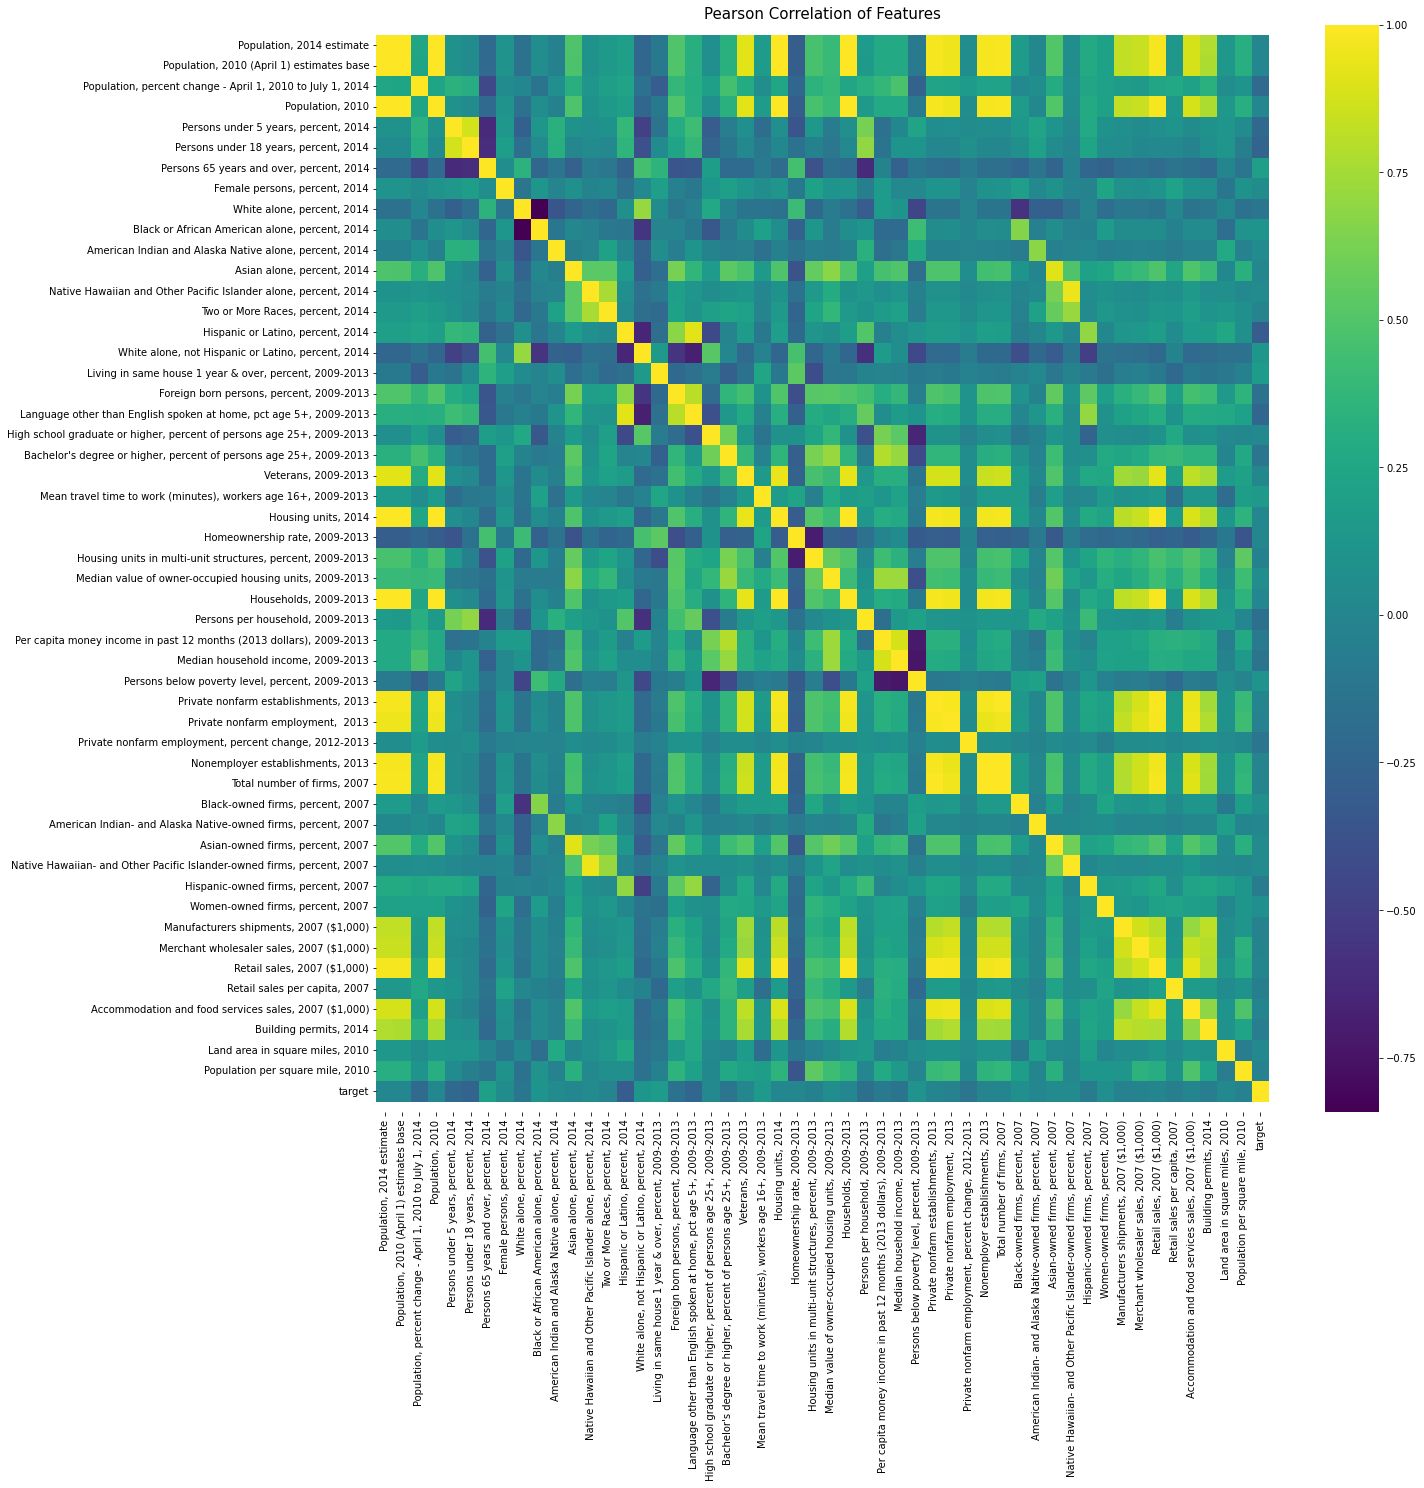

In [115]:
# Heatmap: visualize the correlation between any two features / variables
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_final.corr(), cmap=colormap, annot=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

####  <font color='red'> Question 8: What are your findings from the above correlation matrix and heatmap ? </font>

*  <font color='red'>Students to Answer:     
    </font>
    The population per square mile in 2010 has a low correlation with home ownership rates between 2009 and 2013.
    
    For Private nonfarm establishments/employment, they had a high correlation with features such as sales, total number of firms, and number of households, to name a few.

### 4. Build Machine Learning Models and rank the feature importance

In [116]:
# target as model output (y) and the rest columns as model inputs (X)
X = df_final.drop('target', axis=1)
y = df_final.target

In [117]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [118]:
#Sacaling the data into a smaller range (mostly -3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [119]:
#Random Forest Model
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(max_depth = 8)
                                                                       
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [120]:
print('train_acc:', rf_clf.score(X_train, y_train), 
      '\n test_acc:', rf_clf.score(X_test, y_test))

train_acc: 0.9418789808917197 
 test_acc: 0.8063492063492064


In [121]:
# Feature Importance
pd.set_option('display.max_colwidth', None) # to display the full text in dataframe
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(rf_clf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
14,"Hispanic or Latino, percent, 2014",0.080946
5,"Persons under 18 years, percent, 2014",0.046215
10,"American Indian and Alaska Native alone, percent, 2014",0.038027
18,"Language other than English spoken at home, pct age 5+, 2009-2013",0.036163
17,"Foreign born persons, percent, 2009-2013",0.033254
26,"Median value of owner-occupied housing units, 2009-2013",0.031437
13,"Two or More Races, percent, 2014",0.031215
49,"Land area in square miles, 2010",0.029628
20,"Bachelor's degree or higher, percent of persons age 25+, 2009-2013",0.028069
28,"Persons per household, 2009-2013",0.027044


####  <font color='red'> Question 9: What are your findings from the above feature importance table (generated from Random Forest model) ? </font>

*  <font color='red'>Students to Answer:     
    </font>
    Given that the target was whether Donald Trump won the election in the state, the supposed feature with the highest importance was the percentage of Hispanic or Latino people in said state. The feature with the lowest importance appears to be the percentage of native hawaiian/pacific islander-owned firms. 